In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import spatial

# Load and clean data

In [2]:
df = pd.read_csv('unicorn-data.csv')

In [3]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PULL_UP_FG%,PAINT_TOUCH_PTS,PAINT_TOUCH_FG%,POST_TOUCH_PTS,POST_TOUCH_FG%,ELBOW_TOUCH_PTS,ELBOW_TOUCH_FG%,DFGM,DFGA,DFG%
0,Alex Abrines,guard,25,OKC,31,2,19.0,1.8,5.1,0.357,...,50.0,0.0,0.0,0.0,0.0,0.1,50.0,1.3,1.6,82.0
1,Quincy Acy,big,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.0,0.7,66.7,0.0,0.0,0.2,50.0,0.7,1.3,53.8
2,Jaylen Adams,guard,22,ATL,34,1,12.6,1.1,3.2,0.345,...,32.5,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.5,61.1
3,Steven Adams,big,25,OKC,80,80,33.4,6.0,10.1,0.595,...,46.7,9.6,61.5,3.0,54.6,2.6,59.4,3.7,6.2,60.0
4,Bam Adebayo,big,21,MIA,82,28,23.3,3.4,5.9,0.576,...,48.6,5.3,68.1,0.4,39.4,1.1,47.1,1.6,2.8,58.7


In [4]:
df = df[(df['G'] >= 41) & (df['MP'] >= 10)] # restrict data to players who played at least half the season and 10 MPG

In [5]:
df.columns.values

array(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'TOUCHES', 'FRONT_CT_TOUCHES',
       'TIME_OF_POSS', 'AVG_SEC_PER_TOUCH', 'AVG_DRIB_PER_TOUCH',
       'PTS_PER_TOUCH', 'ELBOW_TOUCHES', 'POST_UPS', 'PAINT_TOUCHES',
       'PTS_PER_ELBOW_TOUCH', 'PTS_PER_POST_TOUCH', 'PTS_PER_PAINT_TOUCH',
       'DRIVE_PTS', 'DRIVE_FG%', 'C&S_PTS', 'C&S_FG%', 'PULL_UP_PTS',
       'PULL_UP_FG%', 'PAINT_TOUCH_PTS', 'PAINT_TOUCH_FG%',
       'POST_TOUCH_PTS', 'POST_TOUCH_FG%', 'ELBOW_TOUCH_PTS',
       'ELBOW_TOUCH_FG%', 'DFGM', 'DFGA', 'DFG%'], dtype=object)

In [6]:
features = df.columns.values[6:] # extract all features to be used later

In [7]:
# function to quickly get the part of a dataframe that matches a certain position

def pos_subset(df, pos, colname):
    return df[df[colname] == pos]

In [8]:
guards = pos_subset(df, 'guard', 'Pos').loc[:, features].values
wings = pos_subset(df, 'wing', 'Pos').loc[:, features].values
bigs = pos_subset(df, 'big', 'Pos').loc[:, features].values

# standardize each subset for PCA

guards = StandardScaler().fit_transform(guards)
wings = StandardScaler().fit_transform(wings)
bigs = StandardScaler().fit_transform(bigs)

In [9]:
subsets = [pd.DataFrame(guards), pd.DataFrame(wings), pd.DataFrame(bigs)]

result = pd.concat(subsets)

# Perform PCA

In [10]:
# function to run PCA on each subset and find the n_components for which the explained variance ratio is above 0.9

def pca_subset(max_components, pos_subset, pos_name):
    
    pca_var_list = []
    
    for n_components in range(2, max_components):
        pca = PCA(n_components = n_components)
        components = pca.fit_transform(pos_subset)
        pca_variance = sum(pca.explained_variance_ratio_)
        pca_var_list.append(pca_variance)
        print("For n_components = {} for {}, explained variance ratio is {}".format(n_components, pos_name, pca_variance))
        
    return pca_var_list, [n for n, i in enumerate(pca_var_list) if i > 0.9][0] + 2

In [11]:
pca_var_g, var_index_g = pca_subset(21, subsets[0], 'guards')

For n_components = 2 for guards, explained variance ratio is 0.4820067520291115
For n_components = 3 for guards, explained variance ratio is 0.5820735185203842
For n_components = 4 for guards, explained variance ratio is 0.6446660141201959
For n_components = 5 for guards, explained variance ratio is 0.7002489824816372
For n_components = 6 for guards, explained variance ratio is 0.7320181934243442
For n_components = 7 for guards, explained variance ratio is 0.7614576705169562
For n_components = 8 for guards, explained variance ratio is 0.783684102588685
For n_components = 9 for guards, explained variance ratio is 0.8047521046976455
For n_components = 10 for guards, explained variance ratio is 0.8253081985787176
For n_components = 11 for guards, explained variance ratio is 0.8440539580002843
For n_components = 12 for guards, explained variance ratio is 0.8603299135000921
For n_components = 13 for guards, explained variance ratio is 0.875638389784795
For n_components = 14 for guards, expl

In [12]:
pca_var_w, var_index_w = pca_subset(21, subsets[1], 'wings')

For n_components = 2 for wings, explained variance ratio is 0.5543047791920199
For n_components = 3 for wings, explained variance ratio is 0.643847504182979
For n_components = 4 for wings, explained variance ratio is 0.6954428661307277
For n_components = 5 for wings, explained variance ratio is 0.7429937774942285
For n_components = 6 for wings, explained variance ratio is 0.7788557776643641
For n_components = 7 for wings, explained variance ratio is 0.809182513640902
For n_components = 8 for wings, explained variance ratio is 0.8289959045817231
For n_components = 9 for wings, explained variance ratio is 0.847705307240834
For n_components = 10 for wings, explained variance ratio is 0.8653321093897733
For n_components = 11 for wings, explained variance ratio is 0.8804575179095478
For n_components = 12 for wings, explained variance ratio is 0.8951026129813046
For n_components = 13 for wings, explained variance ratio is 0.9091472155694973
For n_components = 14 for wings, explained variance

In [13]:
pca_var_b, var_index_b = pca_subset(21, subsets[2], 'bigs')

For n_components = 2 for bigs, explained variance ratio is 0.5518234264846849
For n_components = 3 for bigs, explained variance ratio is 0.6188278808822291
For n_components = 4 for bigs, explained variance ratio is 0.6752950661906105
For n_components = 5 for bigs, explained variance ratio is 0.7257025423179972
For n_components = 6 for bigs, explained variance ratio is 0.754758493956429
For n_components = 7 for bigs, explained variance ratio is 0.782284661505695
For n_components = 8 for bigs, explained variance ratio is 0.8063183375717512
For n_components = 9 for bigs, explained variance ratio is 0.8264893754243813
For n_components = 10 for bigs, explained variance ratio is 0.8458468070153444
For n_components = 11 for bigs, explained variance ratio is 0.8617363307123062
For n_components = 12 for bigs, explained variance ratio is 0.8751849348034433
For n_components = 13 for bigs, explained variance ratio is 0.8882983413667298
For n_components = 14 for bigs, explained variance ratio is 0.

In [14]:
print(var_index_g, var_index_w, var_index_b)

15 13 15


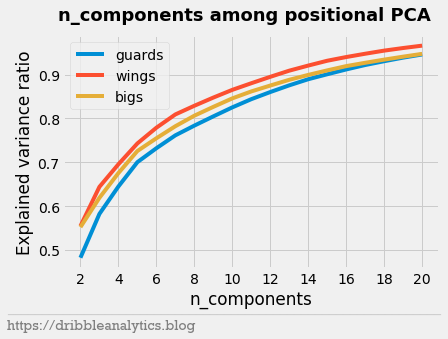

In [15]:
# plot how explained variance ratio changes with n_components among each positional subset

plt.style.use('fivethirtyeight')

pca_fig, ax = plt.subplots()

ax.plot(range(2, 21), pca_var_g, label = 'guards')
ax.plot(range(2, 21), pca_var_w, label = 'wings')
ax.plot(range(2, 21), pca_var_b, label = 'bigs')

ax.set_xlabel('n_components')
ax.set_ylabel('Explained variance ratio')

ax.set_xticks(np.arange(2, 21, 2.0))
ax.legend(loc = 'best')

pca_fig.suptitle("n_components among positional PCA", weight = 'bold', size = 18)

pca_fig.text(x = -0.05, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left', alpha = .3)

pca_fig.text(x = -0.05, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

pca_fig.savefig('pca-variance.png', dpi = 400, bbox_inches = 'tight')

In [16]:
# function to run PCA with the n_components found earlier for each positional subset, then return the PCA data for each subset
# function also returns the 5 most important factors for each component for the sake of basic factor loading analysis

def create_pca_pos(pos_df, n_components, main_df, pos_name):
    
    pca = PCA(n_components = n_components)
    
    pos_df = pd.DataFrame(pos_df)
    comp_pos = pca.fit_transform(pos_df)
    pca_df_pos = pd.DataFrame(data = comp_pos, columns = ['pc_%s' %i for i in range(1, pca.n_components_ + 1)])
    
    pca_df_pos['Player'] = pos_subset(main_df, pos_name, 'Pos')['Player'].values
    pca_df_pos['Pos'] = pos_name
    
    most_important = [np.abs(pca.components_[i]).argpartition(-5)[-5:] for i in range(n_components)]
    most_important_names = [features[most_important[i]] for i in range(n_components)]
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_components)}
    df = pd.DataFrame(dic.items())
    
    return pca_df_pos, df

In [17]:
pca_df_g, factor_loading_g = create_pca_pos(guards, var_index_g, df, 'guard')
pca_df_w, factor_loading_w = create_pca_pos(wings, var_index_w, df, 'wing')
pca_df_b, factor_loading_b = create_pca_pos(bigs, var_index_b, df, 'big')

In [18]:
# function to separate values in list in the factors column

def create_factor_df(factor_df):
    new_df = pd.DataFrame(factor_df.iloc[:, 1].values.tolist())
    return new_df

In [19]:
# save factor dfs to be used with explanation in the post

create_factor_df(factor_loading_g).to_csv('guards_factors.csv')
create_factor_df(factor_loading_w).to_csv('wings_factors.csv')
create_factor_df(factor_loading_b).to_csv('bigs_factors.csv')

In [20]:
# function to get the names and position of each subset

def get_names_pos(df, pos, colname):
    names = pos_subset(df, pos, colname)['Player'].values
    pos = [pos] * len(names)
    
    return names, pos

In [21]:
guard_names, guard_pos = get_names_pos(df, 'guard', 'Pos')
wing_names, wing_pos = get_names_pos(df, 'wing', 'Pos')
big_names, big_pos = get_names_pos(df, 'big', 'Pos')

names = np.concatenate((guard_names, wing_names, big_names))
pos = np.concatenate((guard_pos, wing_pos, big_pos))

# Calculate unicorn index

In [22]:
# get average of the principal components for each position

avg_g = pca_df_g.iloc[:, :-2].mean().values
avg_w = pca_df_w.iloc[:, :-2].mean().values
avg_b = pca_df_b.iloc[:, :-2].mean().values

In [23]:
# get distance between each player and average values for each position, then return the values

def get_dist_pos(pos_df, avg_pos, pos_names):
    
    euclid = []
    manhat = []
    cheby = []
    
    for index, row in pos_df.iterrows():
        euclid.append(spatial.distance.euclidean(list(row[:-2].values), avg_pos))
        manhat.append(spatial.distance.cityblock(list(row[:-2].values), avg_pos))
        cheby.append(spatial.distance.chebyshev(list(row[:-2].values), avg_pos))
        
    dist_df = pd.DataFrame(list(zip(euclid, manhat, cheby)), columns = ['euclidean', 'manhattan', 'chebyshev'])
    dist_df['player'] = pos_names
    dist_df = dist_df.sort_values(by = ['euclidean'], ascending = False)
    dist_df = dist_df.reset_index(drop = True)
    
    return dist_df

In [24]:
guards_dist = get_dist_pos(pca_df_g, avg_g, guard_names)
wings_dist = get_dist_pos(pca_df_w, avg_w, wing_names)
bigs_dist = get_dist_pos(pca_df_b, avg_b, big_names)

In [25]:
# function to plot players by highest distance in each metric for each position

def plot_unique(df, metric, posname, label_height, fname):
    
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots()
    
    df = df.sort_values(by = metric, ascending = False)
    
    y = df[metric][0:10].values
    x = np.arange(len(y))
    
    ax.bar(x, y, color = 'skyblue', edgecolor = 'white', linewidth = 4.5)
    
    ax.xaxis.set_visible(False)
    
    labels = df['player'].values

    rects = ax.patches
    for rect, label in zip(rects, labels):
        ax.text(rect.get_x() + rect.get_width() / 1.75, label_height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
    fig.suptitle("%s distance for %s" % (metric.capitalize(), posname), size = 18, weight = 'bold', y = 1.005)
    ax.set_title('Highest distance from positional mean', size = 14, fontname = 'Rockwell')
    
    fig.text(x = 0, y = 0.02,
        s = '___________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left', alpha = .3)

    fig.text(x = 0, y = -.04,
        s = 'https://dribbleanalytics.blog                     ',
        fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')
    
    fig.savefig('%s.png' % fname, dpi = 400, bbox_inches = 'tight')

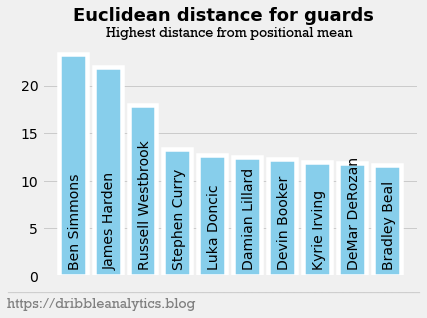

In [26]:
plot_unique(guards_dist, 'euclidean', 'guards', .7, 'guards_dist_euclid')

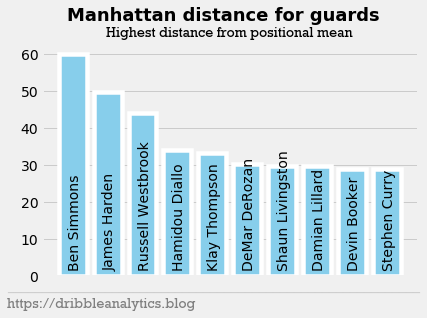

In [27]:
plot_unique(guards_dist, 'manhattan', 'guards', 1.5, 'guards_dist_manhat')

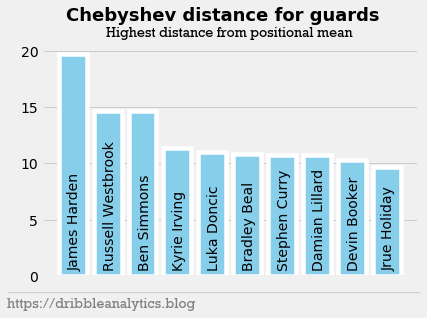

In [28]:
plot_unique(guards_dist, 'chebyshev', 'guards', .5, 'guards_dist_cheby')

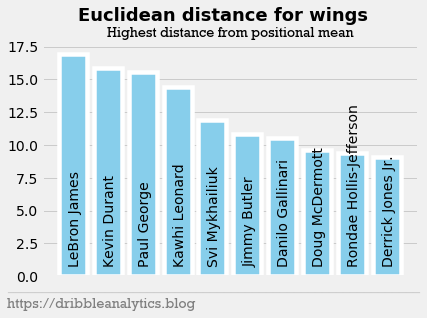

In [29]:
plot_unique(wings_dist, 'euclidean', 'wings', .7, 'wings_dist_euclid')

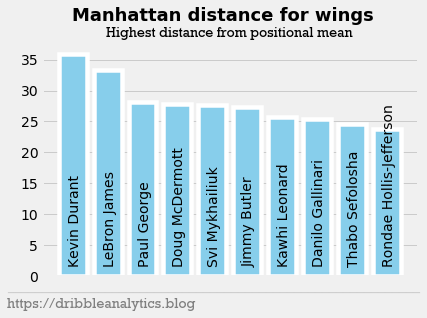

In [30]:
plot_unique(wings_dist, 'manhattan', 'wings', 1.5, 'wings_dist_manhat')

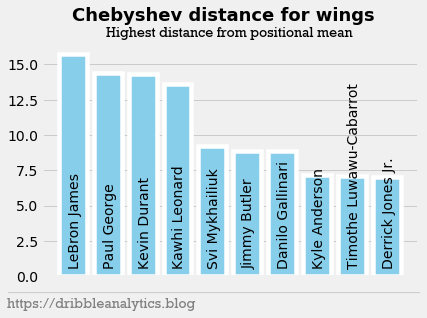

In [31]:
plot_unique(wings_dist, 'chebyshev', 'wings', .5, 'wings_dist_cheby')

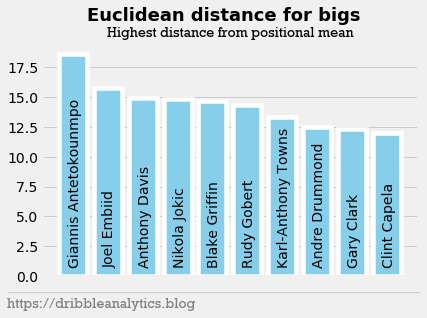

In [32]:
plot_unique(bigs_dist, 'euclidean', 'bigs', .7, 'bigs_dist_euclid')

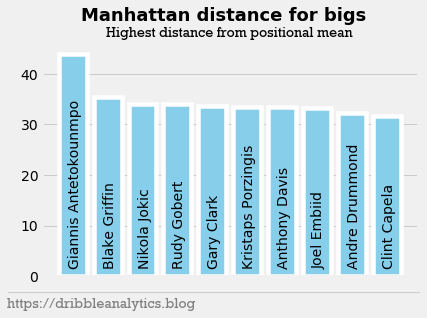

In [33]:
plot_unique(bigs_dist, 'manhattan', 'bigs', 1.5, 'bigs_dist_manhat')

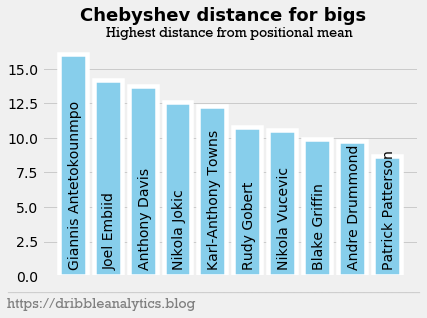

In [34]:
plot_unique(bigs_dist, 'chebyshev', 'bigs', .5, 'bigs_dist_cheby')

In [35]:
# function to normalize distances then take the average in order to create the unicorn index

def get_avg_dist(df):
    
    norm = MinMaxScaler().fit_transform(df[['euclidean', 'manhattan', 'chebyshev']])
    df_norm = pd.DataFrame(norm, columns = ['euclidean', 'manhattan', 'chebyshev'])
    df_norm['unicorn index'] = (df_norm['euclidean'] + df_norm['manhattan'] + df_norm['chebyshev']) / 3
    df_norm['player'] = df['player']
    
    df_norm = df_norm.sort_values(by = 'unicorn index', ascending = False)
    df_norm = df_norm.reset_index(drop = True)
    
    return df_norm

In [36]:
avg_guards = get_avg_dist(guards_dist)
avg_wings = get_avg_dist(wings_dist)
avg_bigs = get_avg_dist(bigs_dist)

In [37]:
# function to plot unicorn index

def index_plot(df, metric, posname, label_height, fname):
    
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots()
    
    df = df.sort_values(by = metric, ascending = False)
    
    y = df[metric][0:10].values
    x = np.arange(len(y))
    
    ax.bar(x, y, color = 'skyblue', edgecolor = 'white', linewidth = 4.5)
    
    ax.set_yticks(np.arange(0, 1.2, .2))
    
    ax.xaxis.set_visible(False)
    
    labels = df['player'].values

    rects = ax.patches
    for rect, label in zip(rects, labels):
        ax.text(rect.get_x() + rect.get_width() / 1.75, label_height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
    fig.suptitle("%s for %s" % (metric.capitalize(), posname), size = 18, weight = 'bold', y = 1.005)
    ax.set_title('1 = most unique possible', size = 14, fontname = 'Rockwell')
    
    fig.text(x = 0, y = 0.02,
        s = '___________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left', alpha = .3)

    fig.text(x = 0, y = -.04,
        s = 'https://dribbleanalytics.blog                     ',
        fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')
    
    fig.savefig('%s.png' % fname, dpi = 400, bbox_inches = 'tight')

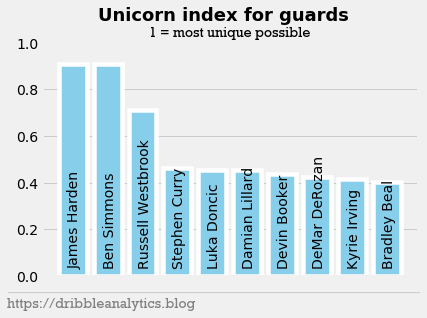

In [38]:
index_plot(avg_guards, 'unicorn index', 'guards', .03, 'guards_unicorn_index')

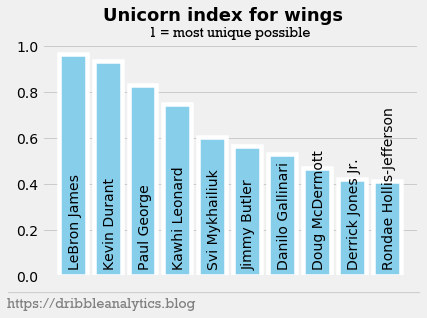

In [39]:
index_plot(avg_wings, 'unicorn index', 'wings', .03, 'wings_unicorn_index')

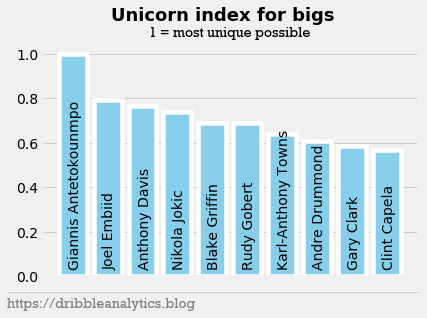

In [40]:
index_plot(avg_bigs, 'unicorn index', 'bigs', .03, 'bigs_unicorn_index')

In [41]:
subsets = [avg_guards, avg_wings, avg_bigs]

unicorn_df = pd.concat(subsets)
unicorn_df = unicorn_df.reset_index()
unicorn_df['index'] += 1
unicorn_df.rename(columns = {'index': 'positional rank'}, inplace = True)

unicorn_df = unicorn_df.sort_values(by = 'unicorn index', ascending = False)

unicorn_df.to_csv('unicorn_index.csv', index = False)